# Target

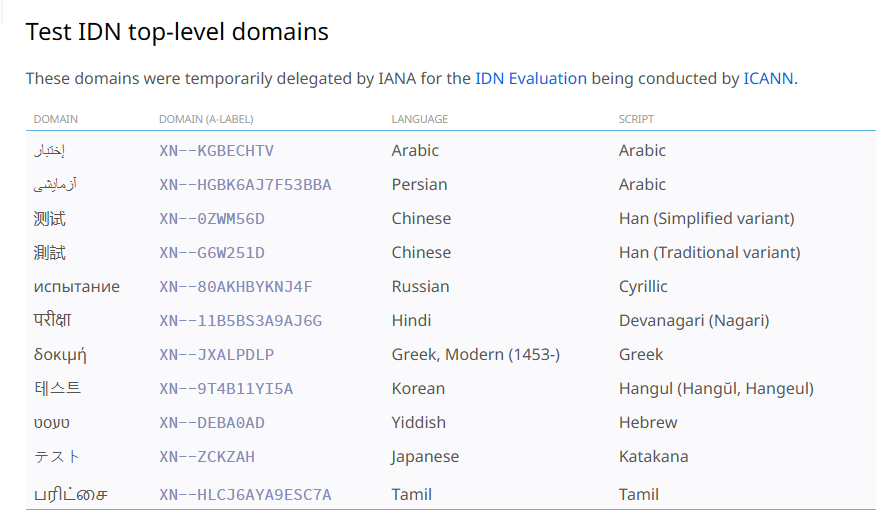

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.iana.org/domains/reserved"
html = requests.get(url)
bs = BeautifulSoup(html.content, "html.parser")
#  bs

In [3]:
title = bs.find_all("h2")[1].contents[0]
title

'Test IDN top-level domains'

In [4]:
desc = bs.find_all("p")[2].contents
desc

['These domains were temporarily delegated by IANA for the ',
 <a href="http://www.icann.org/topics/idn/">IDN Evaluation</a>,
 ' being conducted by ',
 <a href="http://www.icann.org/">ICANN</a>,
 '.']

In [5]:
columns = [i.contents[0] for i in bs.find(class_="iana-table-frame").table.tr.contents]
columns

['Domain', 'Domain (A-label)', 'Language', 'Script']

In [6]:
domain = [
    i.contents[0].contents[0] 
    for i in bs.find(class_="iana-table-frame").table.tbody.contents 
    if i != "\n"
]
domain

['إختبار',
 'آزمایشی',
 '测试',
 '測試',
 'испытание',
 'परीक्षा',
 'δοκιμή',
 '테스트',
 'טעסט',
 'テスト',
 'பரிட்சை']

In [7]:
a_label = [
    i.contents[1].string 
    for i in bs.find(class_="iana-table-frame").table.tbody.contents
    if i.name and i != ""
]
a_label

['XN--KGBECHTV',
 'XN--HGBK6AJ7F53BBA',
 'XN--0ZWM56D',
 'XN--G6W251D',
 'XN--80AKHBYKNJ4F',
 'XN--11B5BS3A9AJ6G',
 'XN--JXALPDLP',
 'XN--9T4B11YI5A',
 'XN--DEBA0AD',
 'XN--ZCKZAH',
 'XN--HLCJ6AYA9ESC7A']

In [8]:
lang = [
    i.contents[3].string 
    for i in bs.find(class_="iana-table-frame").table.tbody.contents
    if i.name and i != ""
]
lang

['Arabic',
 'Persian',
 'Chinese',
 'Chinese',
 'Russian',
 'Hindi',
 'Greek, Modern (1453-)',
 'Korean',
 'Yiddish',
 'Japanese',
 'Tamil']

In [9]:
script = [
    i.contents[4].string 
    for i in bs.find(class_="iana-table-frame").table.tbody.contents
    if i.name and i != ""
]
script

['Arabic',
 'Arabic',
 'Han (Simplified variant)',
 'Han (Traditional variant)',
 'Cyrillic',
 'Devanagari (Nagari)',
 'Greek',
 'Hangul (Hangŭl, Hangeul)',
 'Hebrew',
 'Katakana',
 'Tamil']

# The Final Result

In [10]:
df = pd.DataFrame(
  data={
    columns[0]: domain,
    columns[1]: a_label,
    columns[2]: lang,
    columns[3]: script,
  },
  columns=columns
)
df.style.set_caption(title)


,Domain,Domain (A-label),Language,Script
0,إختبار,XN--KGBECHTV,Arabic,Arabic
1,آزمایشی,XN--HGBK6AJ7F53BBA,Persian,Arabic
2,测试,XN--0ZWM56D,Chinese,Han (Simplified variant)
3,測試,XN--G6W251D,Chinese,Han (Traditional variant)
4,испытание,XN--80AKHBYKNJ4F,Russian,Cyrillic
5,परीक्षा,XN--11B5BS3A9AJ6G,Hindi,Devanagari (Nagari)
6,δοκιμή,XN--JXALPDLP,"Greek, Modern (1453-)",Greek
7,테스트,XN--9T4B11YI5A,Korean,"Hangul (Hangŭl, Hangeul)"
8,טעסט,XN--DEBA0AD,Yiddish,Hebrew
9,テスト,XN--ZCKZAH,Japanese,Katakana
